In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os


In [2]:
os.chdir('D:/프로젝트 & 대회/제 1회 국민대학교 AI빅데이터 분석 경진대회')
print(os.getcwd())

D:\프로젝트 & 대회\제 1회 국민대학교 AI빅데이터 분석 경진대회


In [3]:
apply_train_df = pd.read_csv('./open/apply_train.csv')
company_df = pd.read_csv('./open/company.csv')
recruitment_df = pd.read_csv('./open/recruitment.csv')
resume_certificate_df = pd.read_csv('./open/resume_certificate.csv')
resume_education_df = pd.read_csv('./open/resume_education.csv')
resume_language_df = pd.read_csv('./open/resume_language.csv')
resume_df = pd.read_csv('./open/resume.csv')

In [4]:
mask=(resume_df["resume_seq"] == "U06421")
resume_df[(resume_df["resume_seq"] == "U06421")]

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,job_code_seq2,job_code_seq3,career_month,career_job_code
5858,U06421,2019-11-07,2020-12-18,4,2010,0.0,3100.0,상품기획;홍보;온라인MD,재료·화학·섬유·의복,NaN,NaN,36,도소매;유통;무역


# resume ( 8,482)

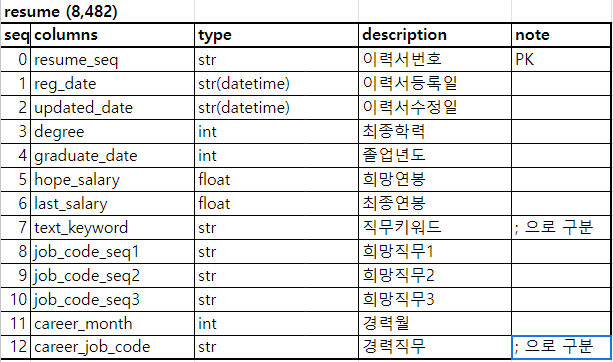

In [5]:
resume_df.head()

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,job_code_seq2,job_code_seq3,career_month,career_job_code
0,U00606,2020-03-04,2020-05-22,4,2008,3500.0,3500.0,스타일디자이너;우븐디자이너,재료·화학·섬유·의복,NaN,NaN,67,NaN
1,U00509,2019-08-25,2020-09-02,2,0,0.0,3700.0,상품기획;MD;기획;머천다이저;머천다이징,재료·화학·섬유·의복,NaN,NaN,84,섬유;봉제;가방;의류
2,U02012,2017-11-20,2020-01-26,5,1979,3500.0,3100.0,니트디자인,재료·화학·섬유·의복,NaN,NaN,121,학교;학원;직원훈련(교육서비스)
3,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,NaN,NaN,24,섬유;봉제;가방;의류
4,U07573,2019-07-23,2020-03-08,4,2010,1900.0,0.0,디자이너;남성복;스포츠웨어;편집디자인;코디네이터;일러스트레이터;VMD;MD,재료·화학·섬유·의복,NaN,NaN,0,NaN


## > resume_seq

모두 고유한 문자열 자료형

In [12]:
# "resume_seq" 컬럼의 데이터 분석

# 데이터 타입 (문자열)
data_type = resume_df["resume_seq"].dtypes

# 중복값 여부  (중복값 없음)
duplicated_values = resume_df["resume_seq"].duplicated().sum()

# 고유한 값의 개수 (8482개)
unique_values = resume_df["resume_seq"].nunique()

print(data_type, duplicated_values, unique_values)

object 0 8482


## > reg_date
- 이력서 등록일 2000~ 2020년 12월까지의 데이터
- 2019~ 2020 년도 이력서 등록량이 매우 늘음.

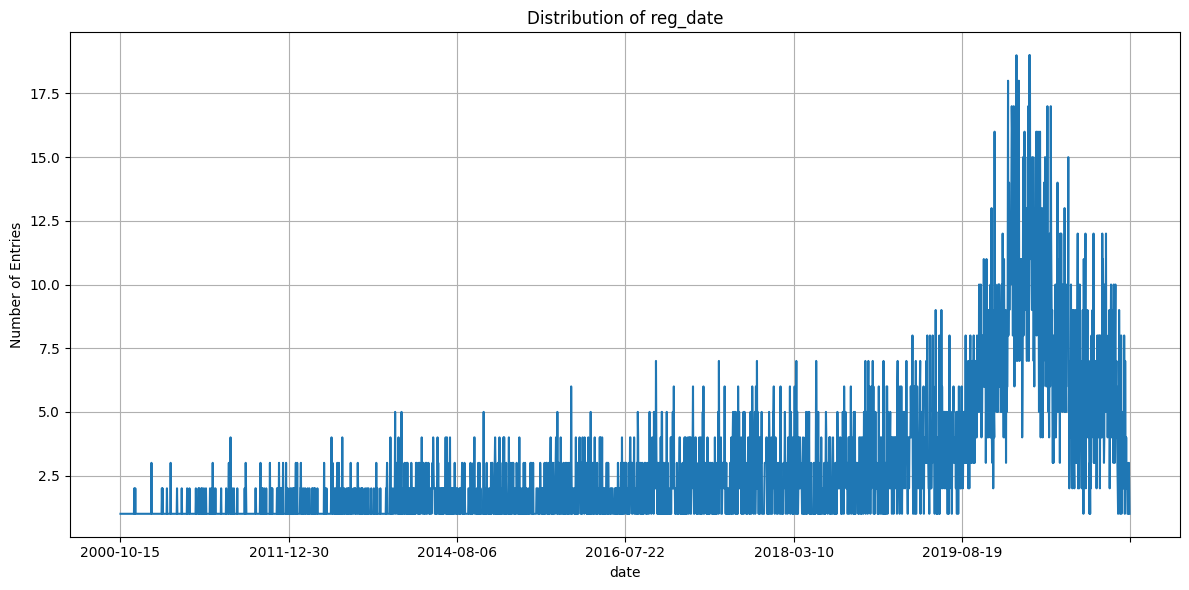

object 0 2000-10-15 2020-12-31


In [14]:
# 1.데이터 타입 확인
data_type = resume_df['reg_date'].dtypes

# 2.결측치 확인
missing_values = resume_df['reg_date'].isnull().sum()

# 3. 최소 날짜 및 최대 날짜 확인
min_date = resume_df['reg_date'].min()
max_date = resume_df['reg_date'].max()

# 4. 날짜데이터의 분포 시각화
plt.figure(figsize=(12, 6))
resume_df['reg_date'].value_counts().sort_index().plot()
plt.title('Distribution of reg_date')
plt.xlabel('date')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()

print(data_type, missing_values, min_date, max_date)

## > update_date
- 이력서가 마지막으로 수정되 날짜
- 모든 데이터가 2020년에 수정이 적어도 한번의 수정이 있었음.

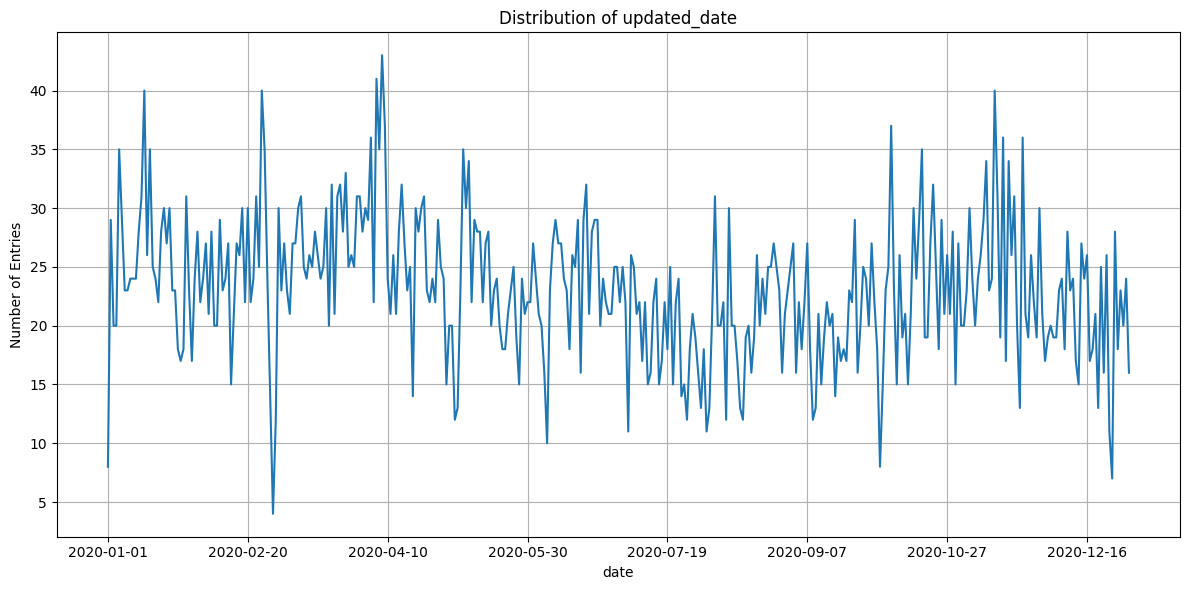

object 0 2020-01-01 2020-12-31


In [18]:
# 1. 데이터 타입 확인
update_date_type = resume_df['updated_date'].dtypes

# 2. 결측값 여부 확인
updated_missing_values = resume_df['updated_date'].isnull().sum()

# 3. 최소 날짜 및 최대 날짜 확인
updated_min_date = resume_df['updated_date'].min()
updated_max_date = resume_df['updated_date'].max()

# 4. 날짜데이터의 분포 시각화
plt.figure(figsize=(12, 6))
resume_df['updated_date'].value_counts().sort_index().plot()
plt.title('Distribution of updated_date')
plt.xlabel('date')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()

print(update_date_type, updated_missing_values, updated_min_date, updated_max_date)


## degree


In [21]:
# degree 컬럼 분석
# 1. 데이터 타입 확인
degree_data_type = resume_df['degree'].dtypes

# 2. 결측값 여부 확인
degree_missing_values = resume_df['degree'].isnull().sum()

# 3. 고유한 값의 개수 확인
degree_unique_values = resume_df['degree'].value_counts()

print(degree_data_type, degree_missing_values, degree_unique_values)

int64 0 degree
4    7453
3     463
5     349
2     211
6       6
Name: count, dtype: int64


## graduate_date
2009년 피크
다른 eda에서도 2009~2012이 지원이 많았다고 하였음.

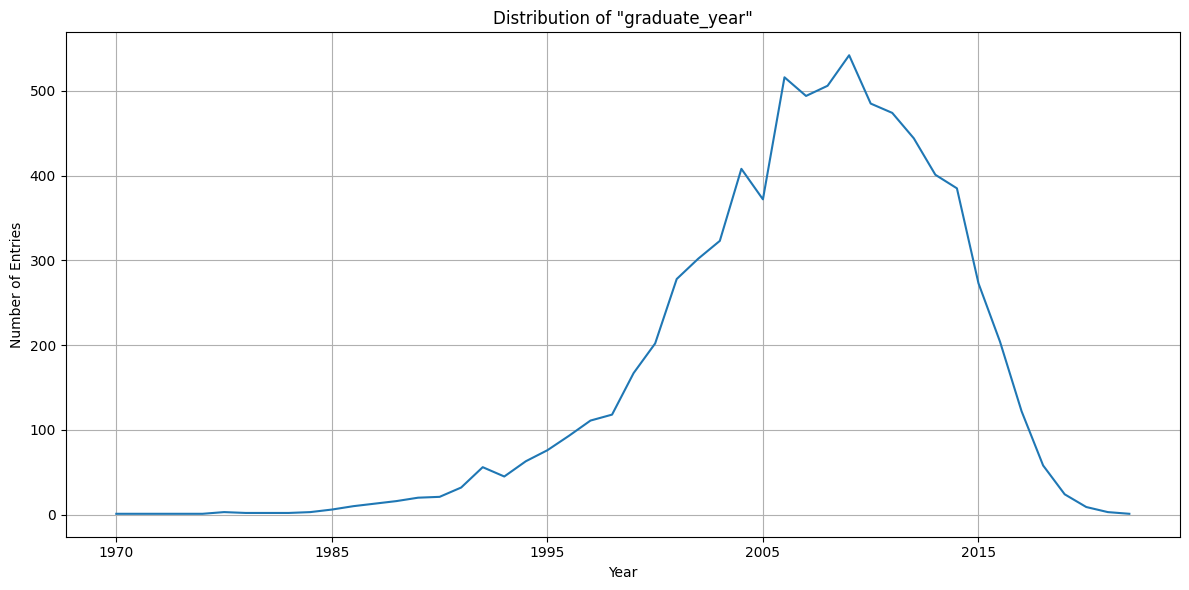

2009


In [34]:
# Convert 'graduate_date' to integers, then extract the year
resume_df['graduate_date'] = pd.to_numeric(resume_df['graduate_date'], errors='coerce')
resume_df['graduate_year'] = resume_df['graduate_date'][resume_df['graduate_date'] > 0].astype(str).str[:4]

plt.figure(figsize=(12, 6))
# Calculate the number of graduates per year
graduate_year_counts_corrected = resume_df['graduate_year'].value_counts().sort_index()
graduate_year_counts_corrected.plot()

plt.title('Distribution of "graduate_year"')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()

## show me max value year in this plot.
print(graduate_year_counts_corrected.idxmax())

## hope salary
- 0 인 경우는 제외 why? 5,000개가 넘음 (이는 절반이상)
- 요약 평균적으로 3,300만원을 희망함.
- 특이상항 : 비정상적으로 높은 연봉을 희망하는 경우가 간혹있음.

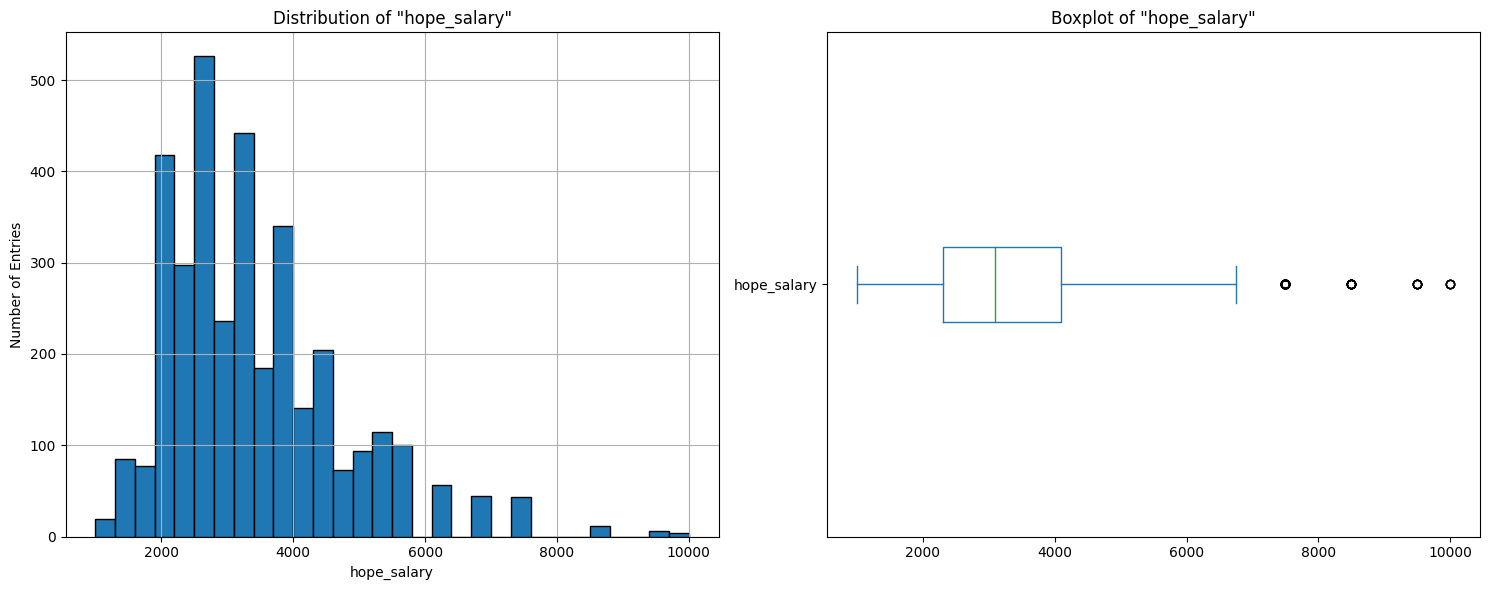

float64 
 0 
 count     3519.000000
mean      3362.659847
std       1332.493239
min       1000.000000
25%       2300.000000
50%       3100.000000
75%       4100.000000
max      10000.000000
Name: hope_salary, dtype: float64
3362.6598465473144


In [42]:
# hope_salary에서 0이 아닌 데이터만 선택
hope_salary = resume_df['hope_salary'][resume_df['hope_salary'] > 0]

# 1. 데이터 타입 확인
hope_salary_data_type = hope_salary.dtypes

# 2. 결측값 여부 확인
hope_salary_missing_values = hope_salary.isnull().sum()

# 3. 기술통계치
hope_salary_describe = hope_salary.describe()

# 4. hope_salary의 분포 시각화
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1) 
hope_salary.hist(bins=30, edgecolor='black')
plt.title('Distribution of "hope_salary"')
plt.xlabel('hope_salary')
plt.ylabel('Number of Entries')

plt.subplot(1,2,2)
hope_salary.plot(kind='box', vert=False)
plt.title('Boxplot of "hope_salary"')

plt.tight_layout()
plt.show()

print(hope_salary_data_type, "\n", hope_salary_missing_values, "\n", hope_salary_describe)

# what is average salary?
print(hope_salary.mean())


## last_salary
위와 같은 전제조건을 같이 한다.

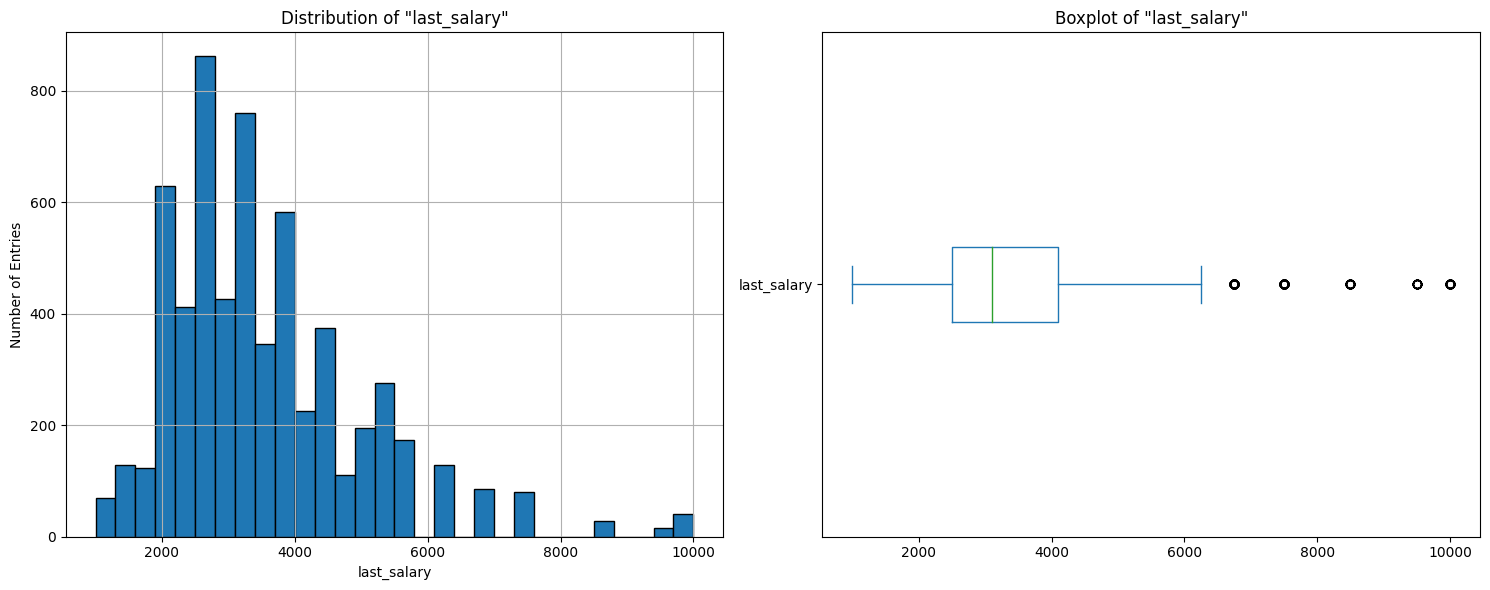

float64 
 0 
 count     6073.000000
mean      3499.654207
std       1471.184256
min       1000.000000
25%       2500.000000
50%       3100.000000
75%       4100.000000
max      10000.000000
Name: last_salary, dtype: float64
3499.6542071463855


In [43]:
# hope_salary에서 0이 아닌 데이터만 선택
last_salary = resume_df['last_salary'][resume_df['last_salary'] > 0]

# 1. 데이터 타입 확인
last_salary_data_type = last_salary.dtypes

# 2. 결측값 여부 확인
last_salary_missing_values = last_salary.isnull().sum()

# 3. 기술통계치
last_salary_describe = last_salary.describe()

# 4. last_salary의 분포 시각화
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1) 
last_salary.hist(bins=30, edgecolor='black')
plt.title('Distribution of "last_salary"')
plt.xlabel('last_salary')
plt.ylabel('Number of Entries')

plt.subplot(1,2,2)
last_salary.plot(kind='box', vert=False)
plt.title('Boxplot of "last_salary"')

plt.tight_layout()
plt.show()

print(last_salary_data_type, "\n", last_salary_missing_values, "\n", last_salary_describe)

# what is average salary?
print(last_salary.mean())


## text_keyword
- 195개의 결측값이 존재, 5300개의 고유 키워드 존재
- 주관적인 키워드인것 같음. 이를 카테고리화가 필요.

In [46]:
# text_keyword 컬럼 분석
# 1. 데이터 타입 확인
text_keyword_data_type = resume_df['text_keyword'].dtypes

# 2. 결측값 여부 확인
text_keyword_missing_values = resume_df['text_keyword'].isnull().sum()

# 3. 고유한 값의 개수 확인
text_keyword_unique_values = resume_df['text_keyword'].value_counts().head(10)
text_keyword_unique_nvalues = resume_df['text_keyword'].nunique()

text_keyword_data_type, text_keyword_missing_values, text_keyword_unique_nvalues, text_keyword_unique_values


(dtype('O'),
 195,
 5295,
 text_keyword
 매장영업관리     273
 디자이너       254
 상품기획       191
 패션디자인      121
 패션디자이너     115
 MD          92
 영업MD        84
 VMD         83
 영업관리        78
 여성복디자이너     77
 Name: count, dtype: int64)

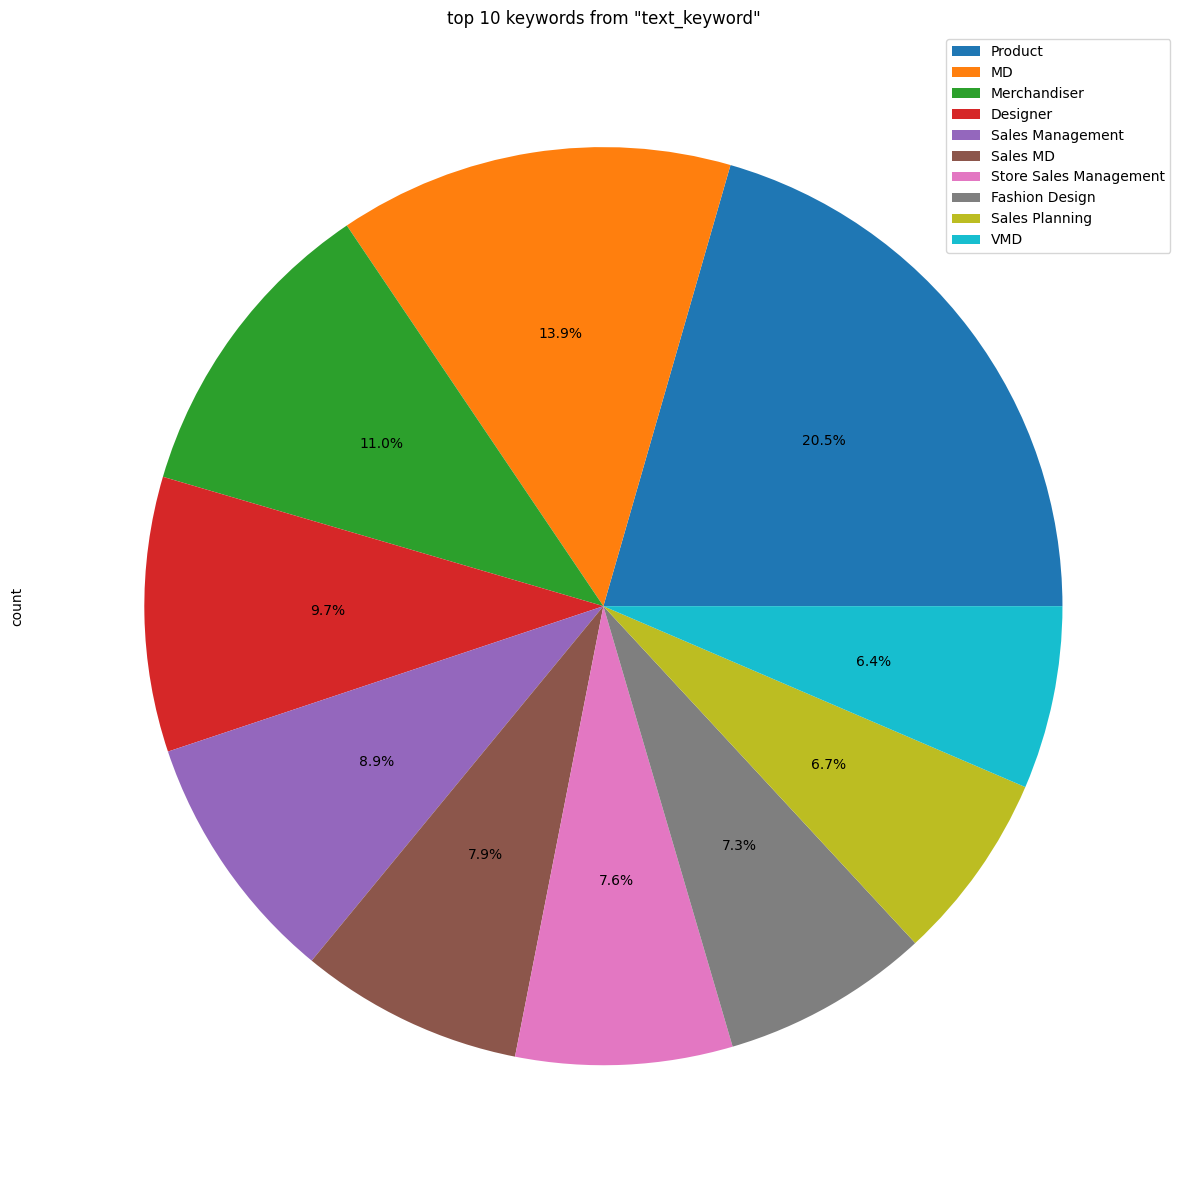

In [57]:
# text_keyword 컬럼에서 세미콜론을 기준으로 키워드 분리
text_keyword_split = resume_df['text_keyword'].str.split(';', expand=True).stack()

# 각 키워드별 빈도수 계산
keyword_counts = text_keyword_split.value_counts()

# 상위 10개 키워드 선택
keyword_counts_top10 = keyword_counts.head(10)
# print(keyword_counts_top10)

# 상위 10개 키워드 한글 라벨을 영어로 매핑
english_keyword_labels = {
    "상품기획": "Product",
    "MD": "MD",
    "머천다이저": "Merchandiser",
    "디자이너": "Designer",
    "영업관리": "Sales Management",
    "영업MD": "Sales MD",
    "매장영업관리": "Store Sales Management",
    "패션디자인": "Fashion Design",
    "영업기획": "Sales Planning",
    "VMD": "VMD"
}

# 한글 라벨을 영어로 변환
keyword_counts_top10_eng = keyword_counts_top10.rename(index=english_keyword_labels, inplace=True)

# 파이 차트 그리기 (라벨 숨김)
plt.figure(figsize=(12, 12))
keyword_counts_top10.plot.pie(autopct='%.1f%%', labels=None)
plt.title('top 10 keywords from "text_keyword"')
#범례 설정
plt.legend(labels=keyword_counts_top10.index, loc='upper right')
plt.tight_layout()
plt.show()



## Job_code_seq1

totla number of job code:  8482


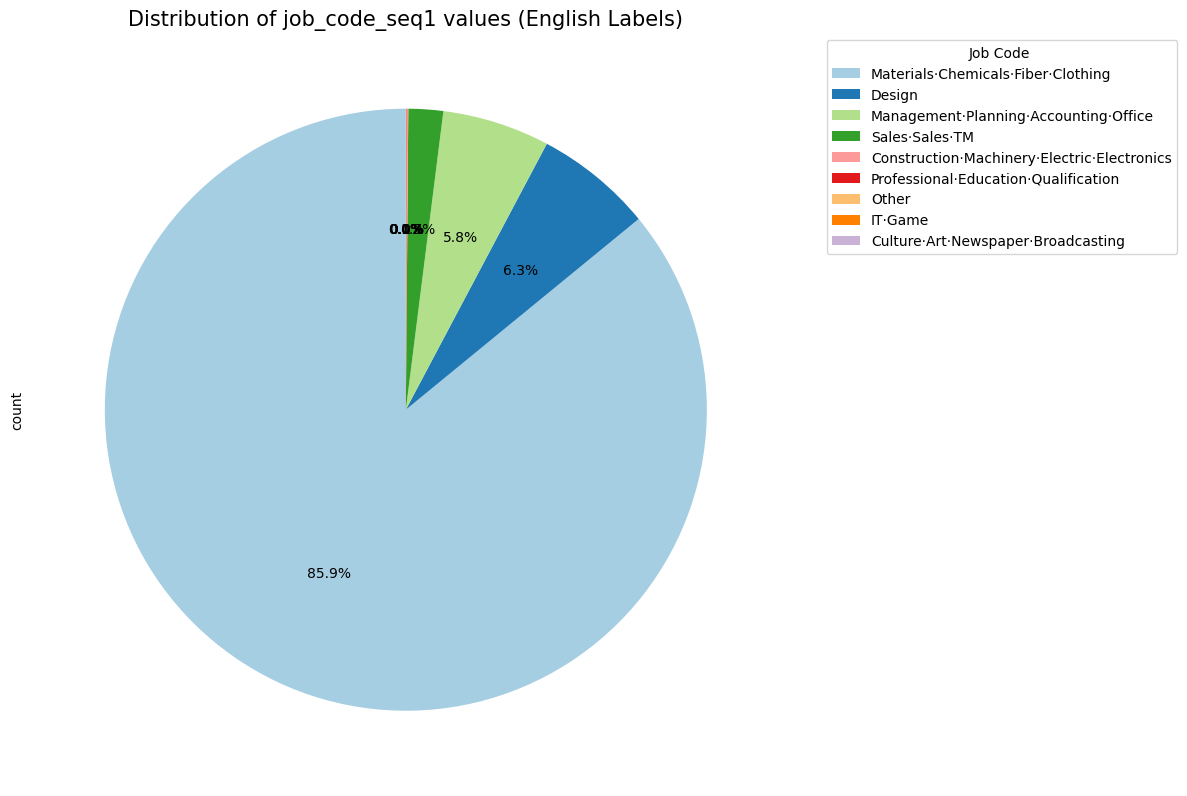

In [65]:
# job_code_seq1 컬럼 값별 빈도수 확인
job_code_seq1_counts = resume_df['job_code_seq1'].value_counts()
job_code_seq1_counts
# 한글 라벨을 영어로 매핑
english_labels = {
    "재료·화학·섬유·의복": "Materials·Chemicals·Fiber·Clothing",
    "디자인": "Design",
    "경영·기획·회계·사무": "Management·Planning·Accounting·Office",
    "영업·판매·TM": "Sales·Sales·TM",
    "건설·기계·전기·전자": "Construction·Machinery·Electric·Electronics",
    "전문·교육·자격": "Professional·Education·Qualification",
    "기타 직종": "Other",
    "IT·게임": "IT·Game",
    "문화·예술·신문·방송": "Culture·Art·Newspaper·Broadcasting"
}

resume_df["job_code_seq1_eng"] = resume_df["job_code_seq1"].map(english_labels)
job_code_seq1_eng_counts = resume_df['job_code_seq1_eng'].value_counts()

a = job_code_seq1_eng_counts.sum()
print("totla number of job code: ", a)

# 파이 차트 그리기
plt.figure(figsize=(12, 12))
pie = job_code_seq1_eng_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=None  # 라벨 숨김
)

# 범례 설정
plt.legend(job_code_seq1_eng_counts.index, title='Job Code ', bbox_to_anchor=(1.05, 1), loc='upper left')

# 제목 설정
plt.title('Distribution of job_code_seq1 values (English Labels)', fontsize=15)

# 그래프 출력
plt.tight_layout()
plt.show()

## job_code_seq 2 와 3 은 숫자가 너무 적어서 의미가 없음.

## career_month

- 12개월(1년)을 범위로 하여 career_motnh 컬럼의 값을 분석
- 다음과 같은 범위로 분류
    - 0~12 개월 13~24 개월 25~36 개월 37~48개월 49~60개월 61~ 개월 이상

        - 신입이거나 6년 이상 일한 경우가 반 이상이다.

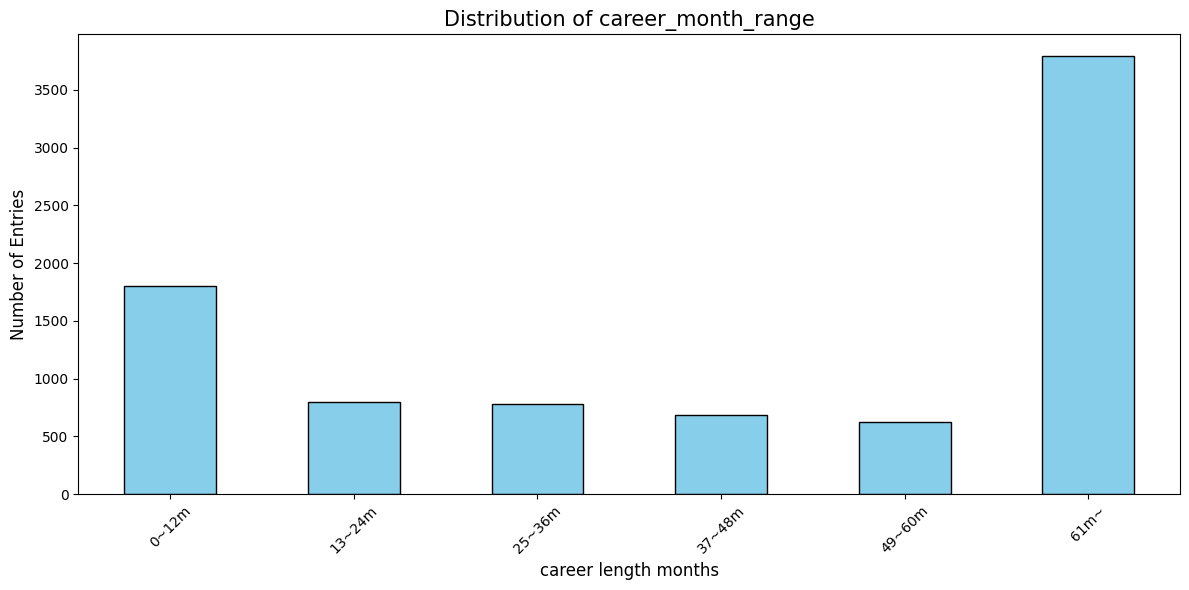

In [73]:
# 12개월을 범위로 career_month 컬럼 값을 분류
bins = [-1, 12, 24, 36, 48, 60, resume_df['career_month'].max()]
labels = ['0~12m', '13~24m', '25~36m', '37~48m', '49~60m', '61m~']

# pd.cut을 사용하여 범위별로 분류
resume_df['career_month_range'] = pd.cut(resume_df['career_month'], bins=bins, labels=labels)

# 각 범위별 빈도수 확인
career_month_range_count = resume_df['career_month_range'].value_counts().sort_index()

# 바 그래프로 시각화
plt.figure(figsize=(12, 6))
career_month_range_count.plot(kind='bar', rot=0, color='skyblue', edgecolor='black')

# 그래프 설정
plt.title('Distribution of career_month_range', fontsize=15)
plt.xlabel('career length months', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## career_job_code

In [66]:
# career_job_code 빈도수 계산
career_job_code = resume_df['career_job_code'].value_counts()
career_job_code

career_job_code
섬유;봉제;가방;의류            5059
도소매;유통;무역               821
디자인;CAD;설계              653
쇼핑몰;전자상거래;경매            133
기타 서비스                  119
학교;학원;직원훈련(교육서비스)        99
기타 제조                    81
광고;홍보                    81
영화;방송;공연;문화;스포츠          79
생활용품;화장품;완구              53
건설;토목;건축                 52
식음료;식품가공                 49
금융;보험;증권                 43
호텔;숙박;관광;여행;외식           35
전기;전자;통신장비               35
출판;인쇄;편집;영상              30
신문;서적;출판;인쇄              28
자동차;운송장비;조선;항공           27
공공행정;경찰;기관;협회            26
의료;제약;건강                 22
인터넷서비스;포털;컨텐츠            20
컴퓨터;사무기기;소비재             19
운송;운수;통신                 15
철강;금속;비금속;재료             15
반도체;LCD;광학;정밀            13
화학;고무;플라스틱               13
목재;나무;종이;가구              11
네트워크;통신;텔레콤              11
기타 공공;개인서비스              10
병원;제약;사회복지               10
기계;각종 장비                  9
웹에이전시                     9
인력공급;시설유지;TM(용역;도급)       8
IT 컨설팅;조사분석;통계            8
게임;캐릭터;애니메이션              7
전기;가

# company

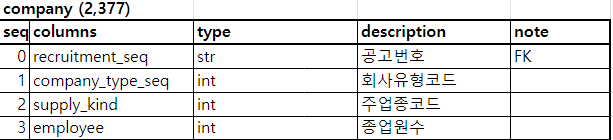

In [77]:
recruitment_df.head()
print(recruitment_df["major_task"].value_counts())

major_task
2     6341
8      221
7      103
1       24
9        3
10       2
6        1
Name: count, dtype: int64


## supply_kind
- 402로 가장 많음.

In [78]:
company_df.head()
## supply_kind 업종 코드
print(company_df["supply_kind"].value_counts())

supply_kind
402    1606
100     463
514     126
201     101
508      33
501      20
515       6
409       5
601       5
507       4
413       2
605       1
502       1
513       1
512       1
412       1
603       1
Name: count, dtype: int64


## company_type_seq
- 6개의 코드가 있음.
- 하지만 대기업 중소 소기업을 구분짓는 용도가 되지 않는 것 같음. (직원수와 엮었을 때)
- 하지만 대부분의 500명 이상의 직원수를 가진 기업은 코드 5를 공유함.
    - 1등은 5번, 2등만 특이하게 7번이였음.

In [97]:
company_df["company_type_seq"].value_counts()

company_type_seq
2    1658
4     410
5     161
9     109
7      35
3       4
Name: count, dtype: int64

In [98]:
company_df[(company_df["employee"] > 600)]


,recruitment_seq,company_type_seq,supply_kind,employee
10,R00974,5,402,1000
12,R04655,5,402,800
56,R02421,5,402,800
175,R01443,5,402,800
219,R06306,5,402,1000
248,R02020,5,201,631
255,R06325,5,402,800
259,R05922,5,409,650
318,R00227,5,100,1600
364,R05684,5,412,2000


# recruitment

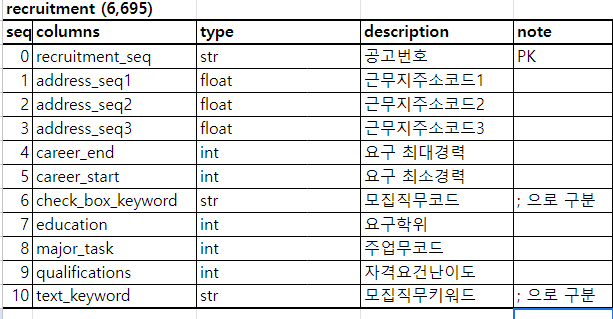

In [99]:
recruitment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   recruitment_seq    6695 non-null   object 
 1   address_seq1       6694 non-null   float64
 2   address_seq2       100 non-null    float64
 3   address_seq3       9 non-null      float64
 4   career_end         6695 non-null   int64  
 5   career_start       6695 non-null   int64  
 6   check_box_keyword  6695 non-null   object 
 7   education          6695 non-null   int64  
 8   major_task         6695 non-null   int64  
 9   qualifications     6695 non-null   int64  
 10  text_keyword       707 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 575.5+ KB


## Career_end & start 
- 둘다 0 으로 의미가 없다.

In [116]:
recruitment_df["career_start"].value_counts()

career_start
0    6695
Name: count, dtype: int64

## address_seq1

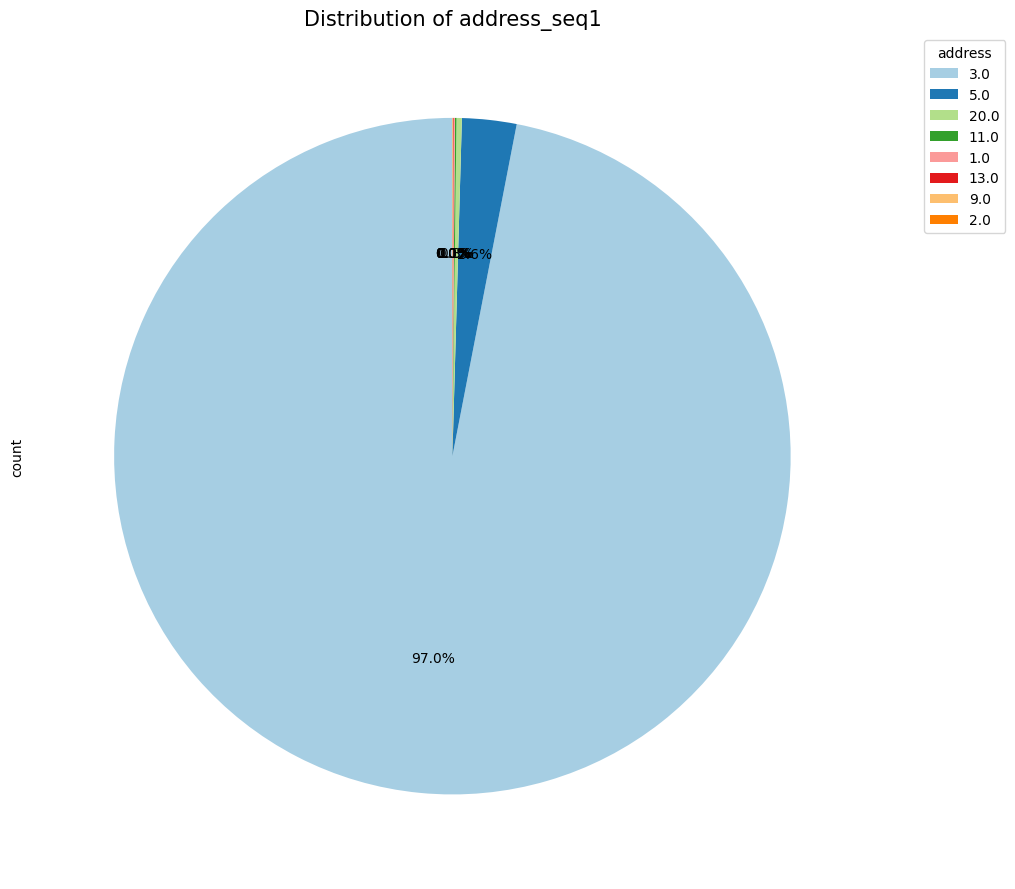

In [123]:
# address_seq1 컬럼 값별 빈도수 확인
address_seq1_counts = recruitment_df['address_seq1'].value_counts()
address_seq1_counts


# # 파이 차트 그리기
plt.figure(figsize=(12, 9))
pie = address_seq1_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=None  # 라벨 숨김
)

# 범례 설정
plt.legend(address_seq1_counts.index, title='address', bbox_to_anchor=(1.05, 1), loc='upper left')

# 제목 설정
plt.title('Distribution of address_seq1', fontsize=15)

# 그래프 출력
plt.tight_layout()
plt.show()

## check box keyword
- 모든 카테고리가 겹친다.
- 고유의 카테고리는 없어 보인다.
- (recruiment + company를 합쳐서 확인할 필요가 있어 보인다.)

In [131]:
recruitment_df["major_task"].value_counts()

major_task
2     6341
8      221
7      103
1       24
9        3
10       2
6        1
Name: count, dtype: int64

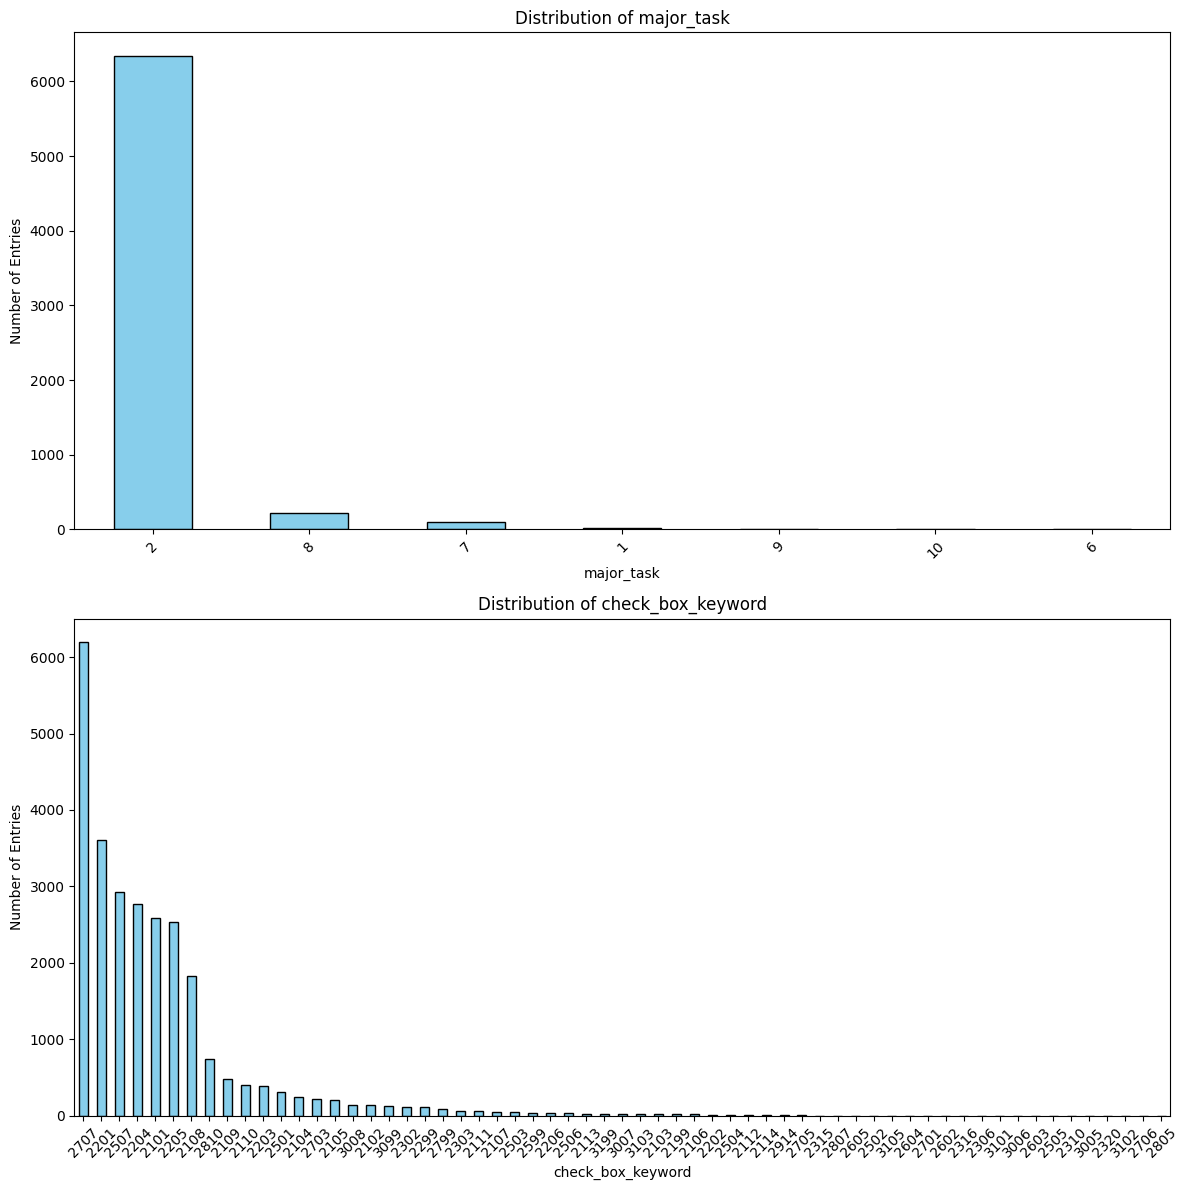

In [145]:
# check_box_keyword 컬럼에서 세미콜론을 기준으로 키워드 분리
check_box_keyword_split = recruitment_df['check_box_keyword'].str.split(';', expand=True).stack()
check_box_keyword_split

# major_task 컬럼과 check_box_keyword 컬럼의 키워드를 같이 시각화
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
recruitment_df['major_task'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of major_task')
plt.xlabel('major_task')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
check_box_keyword_split.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of check_box_keyword')
plt.xlabel('check_box_keyword')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


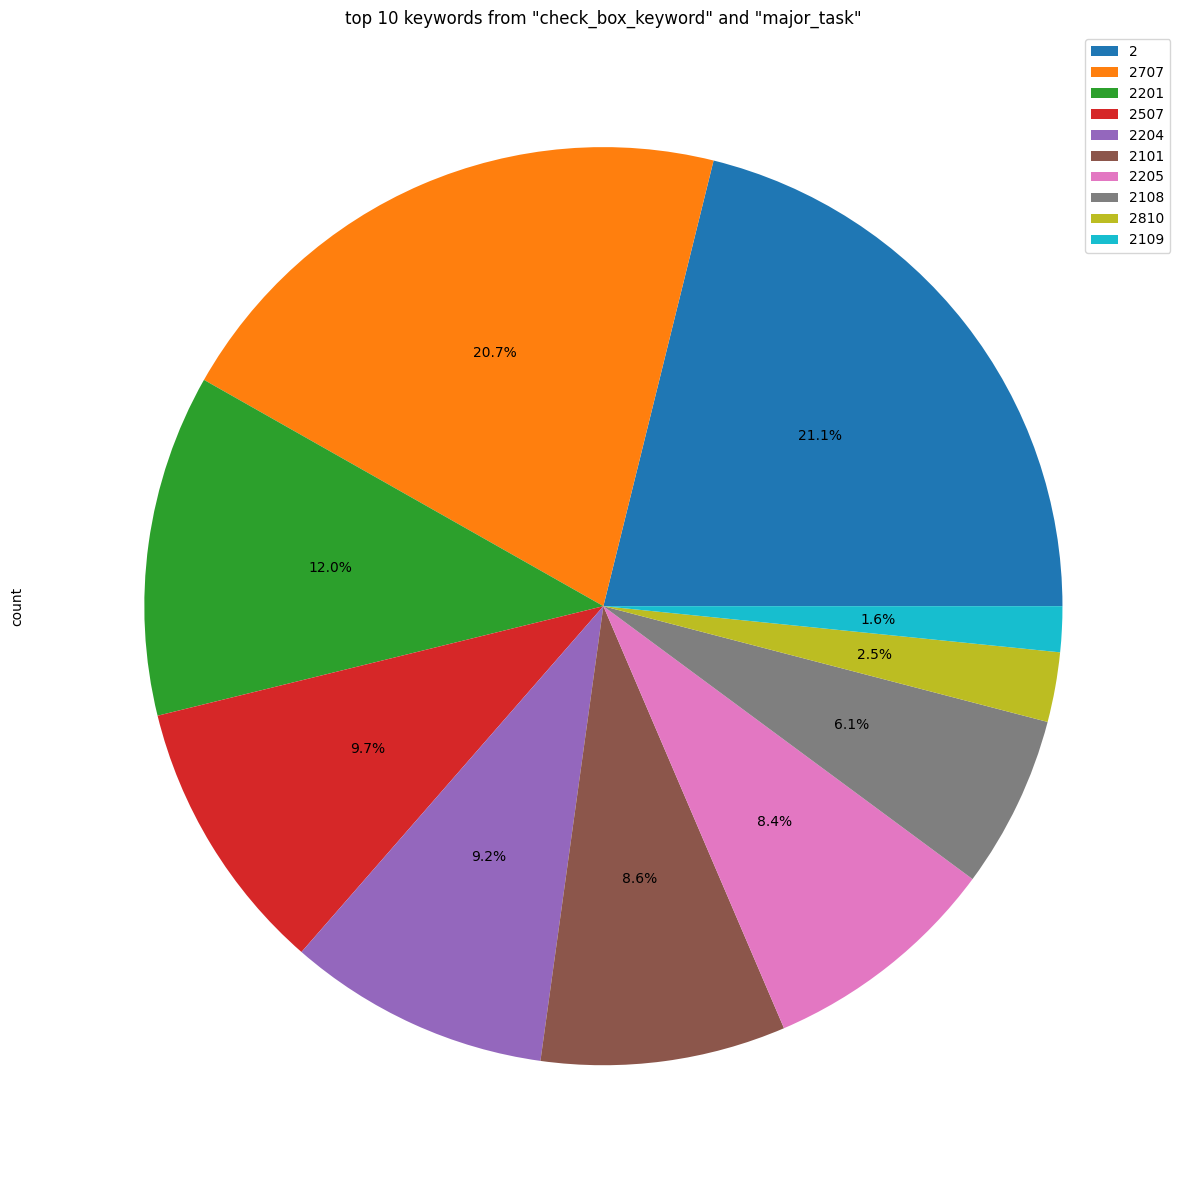

In [141]:
# check_box_keyword_split 컬럼의 키워드를 인덱스로 설정
check_box_keyword_split_df = check_box_keyword_split.to_frame()
check_box_keyword_split_df.columns = ['keyword']
check_box_keyword_split_df.index = range(len(check_box_keyword_split_df))

# major_task 컬럼의 키워드를 인덱스로 설정
major_task_df = recruitment_df['major_task'].to_frame()
major_task_df.columns = ['keyword']
major_task_df.index = range(len(major_task_df))

# check_box_keyword_split_df 와 major_task_df 를 합침
keyword_df = pd.concat([check_box_keyword_split_df, major_task_df])
keyword_df

# 키워드별 빈도수 계산
keyword_counts = keyword_df['keyword'].value_counts()
keyword_counts

# 상위 10개 키워드 선택
keyword_counts_top10 = keyword_counts.head(10)
keyword_counts_top10

# 파이 차트 그리기 (라벨 숨김)
plt.figure(figsize=(12, 12))
keyword_counts_top10.plot.pie(autopct='%.1f%%', labels=None)
plt.title('top 10 keywords from "check_box_keyword" and "major_task"')
#범례 설정
plt.legend(labels=keyword_counts_top10.index, loc='upper right')
plt.tight_layout()
plt.show()

In [158]:
# major_task를 그룹화하여 check_box_keyword_split 컬럼의 키워드별 빈도수 계산
keyword_counts_by_major_task = recruitment_df.groupby('major_task')
keyword_counts_by_major_task

# 위 그룹화를 데이터 프레임을 통해 확인
keyword_counts_by_major_task_df = keyword_counts_by_major_task['check_box_keyword'].value_counts()
keyword_counts_by_major_task_df


major_task  check_box_keyword                 
1           2507;2707                             7
            2707;2101                             4
            2507;2204;2201                        3
            2501;2507;2707                        2
            2109;2203;2302;2707                   1
                                                 ..
8           2101;2108;2201;2303;2507;2707;2810    1
9           2501;2507;2707                        1
            2507;2707                             1
            2507;2707;2203                        1
10          2507;2707                             2
Name: count, Length: 837, dtype: int64

# resume_language & resume_certificate & resume_education 는 의미가 없다.
- 자격증명 == 여러가지의 난잡한 이름으로 되어 있음.
- 외국어등 원하는 것들의 점수와는 다른 것을 하기 어려움.
- 마찬가지로 학위와 학위코드를 연결하기 어려웠음.

# Company + Recruiment
합쳐서 분석

In [161]:
# recruiment_df 에 company_df을 합침
firm_df = pd.merge(recruitment_df, company_df, on='recruitment_seq', how='left')
firm_df

,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,text_keyword,company_type_seq,supply_kind,employee
0,R02264,3.0,NaN,NaN,0,0,2507;2707;2810,4,8,1,NaN,5.0,402.0,800.0
1,R06317,3.0,NaN,NaN,0,0,2204;2205;2707,3,2,1,NaN,NaN,NaN,NaN
2,R04017,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,1,NaN,NaN,NaN,NaN
3,R02865,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,1,NaN,NaN,NaN,NaN
4,R04890,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,R03678,3.0,NaN,NaN,0,0,2101;2108;2201;2204;2205;2707,3,2,1,NaN,NaN,NaN,NaN
6691,R04593,3.0,NaN,NaN,0,0,2201;2204;2205;2707,4,2,1,NaN,NaN,NaN,NaN
6692,R03252,3.0,NaN,NaN,0,0,2109,3,2,1,NaN,4.0,402.0,525.0
6693,R05130,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,NaN,2.0,402.0,40.0


In [162]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   recruitment_seq    6695 non-null   object 
 1   address_seq1       6694 non-null   float64
 2   address_seq2       100 non-null    float64
 3   address_seq3       9 non-null      float64
 4   career_end         6695 non-null   int64  
 5   career_start       6695 non-null   int64  
 6   check_box_keyword  6695 non-null   object 
 7   education          6695 non-null   int64  
 8   major_task         6695 non-null   int64  
 9   qualifications     6695 non-null   int64  
 10  text_keyword       707 non-null    object 
 11  company_type_seq   2377 non-null   float64
 12  supply_kind        2377 non-null   float64
 13  employee           2377 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 732.4+ KB


In [169]:
# firm_df의 address_seq2, address_seq3 의 결측치 중간값 으로 대체
firm_df['address_seq2'] = firm_df['address_seq2'].fillna(5)
firm_df['address_seq3'] = firm_df['address_seq3'].fillna(20)
firm_df['address_seq1'] = firm_df['address_seq1'].fillna(3)

# firm_df의 company_type_seq 의 결측치 '2'으로 대체
firm_df['company_type_seq'] = firm_df['company_type_seq'].fillna(2)

# firm_df의 employee의 결측치 employee의 평균값으로 대체
firm_df['employee'] = firm_df['employee'].fillna(firm_df['employee'].mean())

# firm_df의 supply_kind 의 결측치 '402' 으로 대체
firm_df['supply_kind'] = firm_df['supply_kind'].fillna(402)




In [181]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   recruitment_seq    6695 non-null   object 
 1   address_seq1       6695 non-null   float64
 2   address_seq2       6695 non-null   float64
 3   address_seq3       6695 non-null   float64
 4   career_end         6695 non-null   int64  
 5   career_start       6695 non-null   int64  
 6   check_box_keyword  6695 non-null   object 
 7   education          6695 non-null   int64  
 8   major_task         6695 non-null   int64  
 9   qualifications     6695 non-null   int64  
 10  text_keyword       707 non-null    object 
 11  company_type_seq   6695 non-null   float64
 12  supply_kind        6695 non-null   float64
 13  employee           6695 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 732.4+ KB


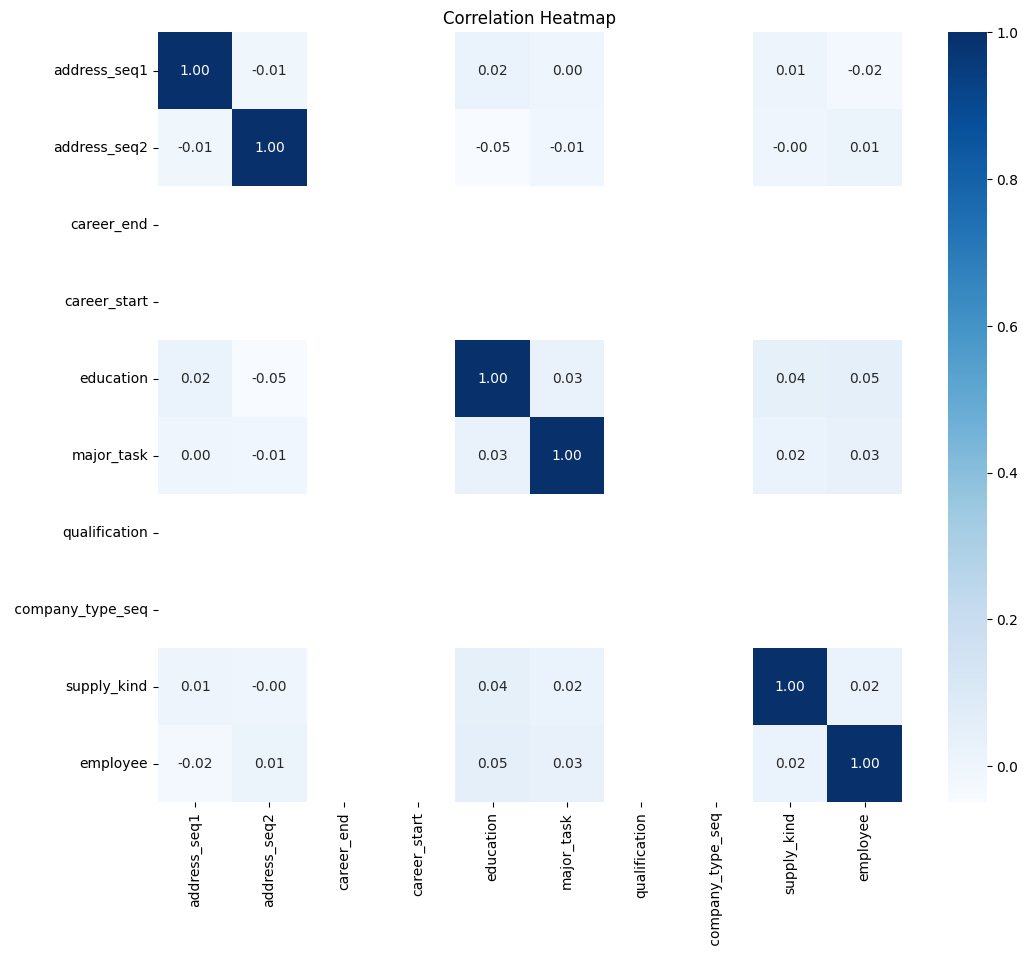

In [186]:
selected_cols = ["address_seq1", "address_seq2", "career_end", "career_start", "education", "major_task", "qualification", " company_type_seq", "supply_kind", "employee"]

corr_df = pd.DataFrame(firm_df, columns=selected_cols)

# corr_df 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


- 딱히 상관관계가 있어 보이지 않는다.

In [195]:
firm_df["company_type_seq"].value_counts()

company_type_seq
2.0    5976
4.0     410
5.0     161
9.0     109
7.0      35
3.0       4
Name: count, dtype: int64

supply_kind
402.0    5924
100.0     463
514.0     126
201.0     101
508.0      33
501.0      20
515.0       6
409.0       5
601.0       5
507.0       4
413.0       2
512.0       1
605.0       1
603.0       1
412.0       1
502.0       1
513.0       1
Name: count, dtype: int64
company_type_seq
2.0    5976
4.0     410
5.0     161
9.0     109
7.0      35
3.0       4
Name: count, dtype: int64


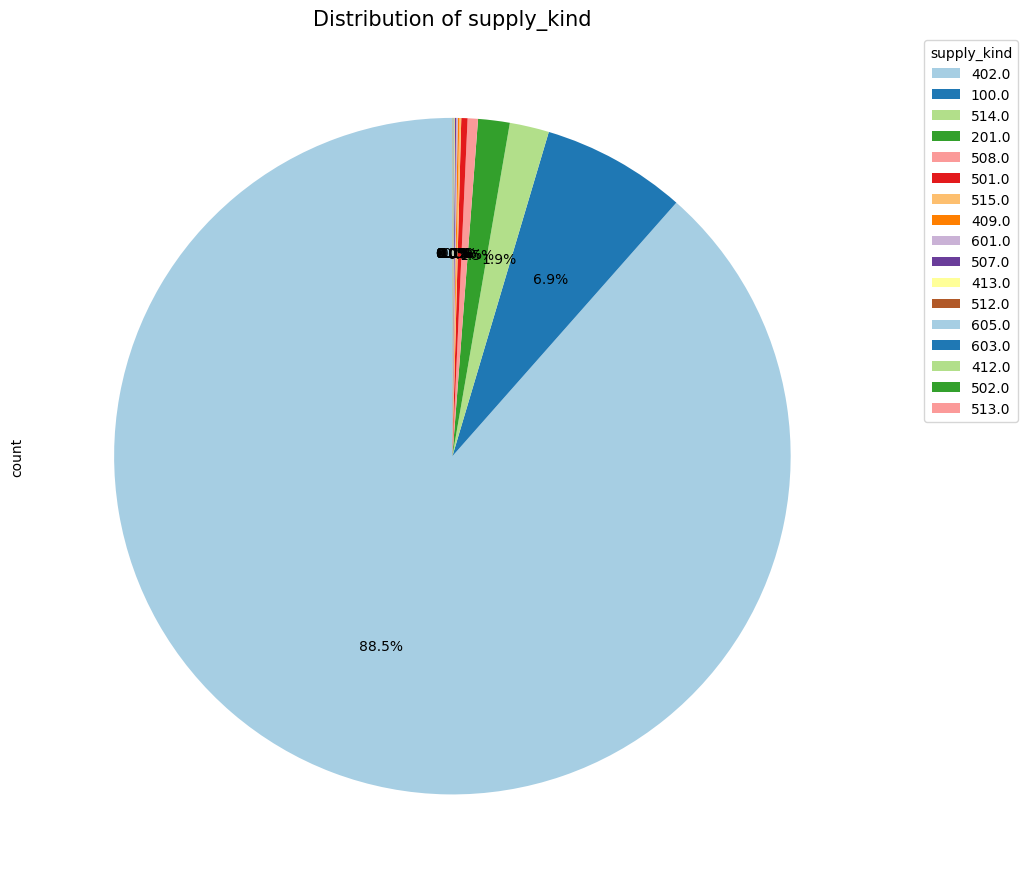

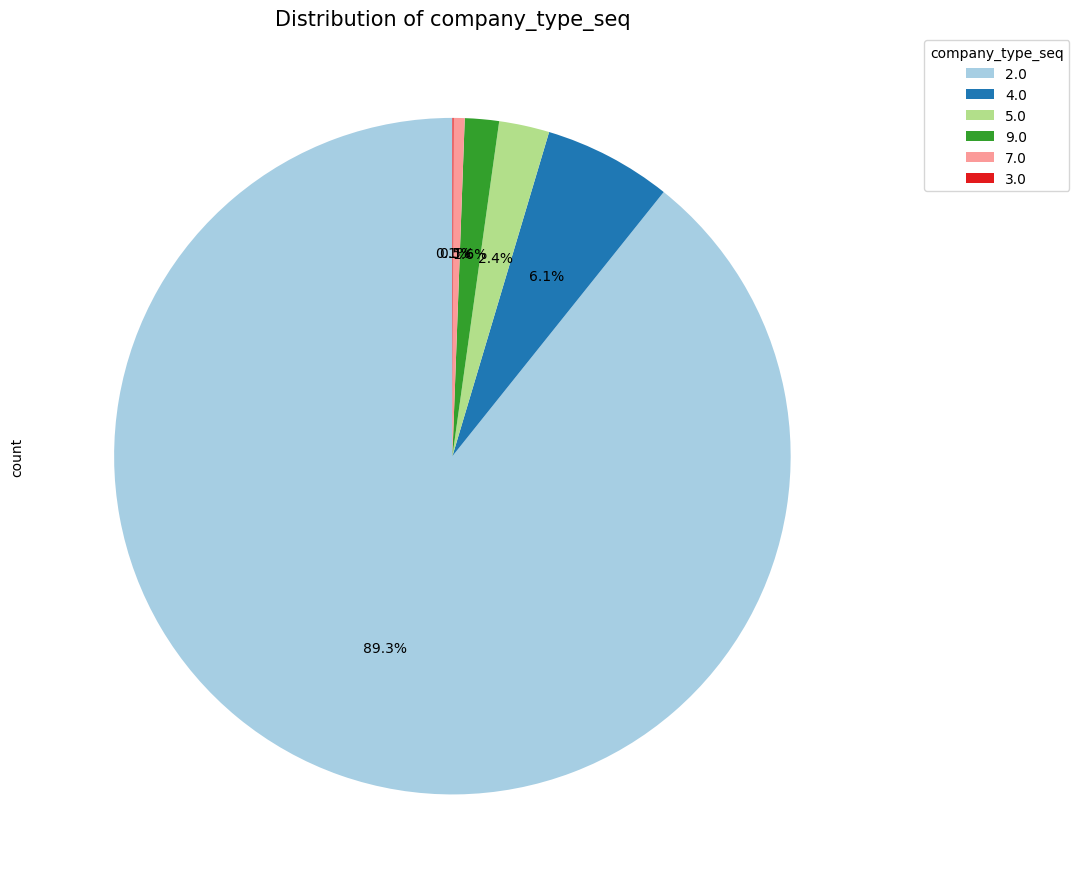

In [199]:
# do EDA for supply_kind and company_type_seq columns in firm_df
# supply_kind 업종 코드
print(firm_df["supply_kind"].value_counts())

# company_type_seq 회사 유형 코드
print(firm_df["company_type_seq"].value_counts())

# i want to visualize these two columns
# 1. supply_kind
plt.figure(figsize=(12, 9))
pie = firm_df["supply_kind"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=None  # 라벨 숨김
)

# 범례 설정
plt.legend(firm_df["supply_kind"].value_counts().index, title='supply_kind', bbox_to_anchor=(1.05, 1), loc='upper left')

# 제목 설정
plt.title('Distribution of supply_kind', fontsize=15)

# 그래프 출력
plt.tight_layout()
plt.show()

# 2. company_type_seq
plt.figure(figsize=(12, 9))

pie = firm_df["company_type_seq"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=None  # 라벨 숨김
)

# 범례 설정
plt.legend(firm_df["company_type_seq"].value_counts().index, title='company_type_seq', bbox_to_anchor=(1.05, 1), loc='upper left')

# 제목 설정
plt.title('Distribution of company_type_seq', fontsize=15)

# 그래프 출력
plt.tight_layout()
plt.show()

- 2 와 4 가 같이 402와 많이 겹칠걸로 보인다.